# DATASET LOADING

In [2]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
df = pd.read_csv('/kaggle/input/apple-stock-price-from-19802021/AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [4]:
df.shape

(10468, 7)

# DATA PREPROCESSING

In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.set_index('Date', inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10468 entries, 1980-12-12 to 2022-06-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10468 non-null  float64
 1   High       10468 non-null  float64
 2   Low        10468 non-null  float64
 3   Close      10468 non-null  float64
 4   Adj Close  10468 non-null  float64
 5   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 572.5 KB


In [10]:
df.sort_index(inplace = True)

In [11]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [12]:
#APPLY LOG TRANSFORMATION TO VOLUME TO STABALIZE VARIANCE
df['log_vol'] = np.log(df['Volume']+1)

In [13]:
df.drop(columns = ['Volume'], inplace = True)

In [14]:
df.head()

,Open,High,Low,Close,Adj Close,log_vol
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,19.966185
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,18.985340
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,18.476380
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,18.274980
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,18.112110


In [15]:
#NORMALIZING THE DATA
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[df.columns])

In [16]:
scaled_values

array([[4.30950014e-04, 4.33270567e-04, 4.42511906e-04, 4.35483696e-04,
        3.40815838e-04, 8.78496937e-01],
       [3.97331936e-04, 3.96658463e-04, 4.05118893e-04, 3.98684579e-04,
        3.12018225e-04, 8.35340496e-01],
       [3.48427437e-04, 3.47836857e-04, 3.55255959e-04, 3.49613594e-04,
        2.73615897e-04, 8.12946667e-01],
       ...,
       [7.35239774e-01, 7.50670228e-01, 7.37757535e-01, 7.44010911e-01,
        7.46069029e-01, 8.06603288e-01],
       [7.23135563e-01, 7.23604845e-01, 7.20334206e-01, 7.14499102e-01,
        7.16477939e-01, 8.13932603e-01],
       [7.12126738e-01, 7.27377614e-01, 7.24634207e-01, 7.22742631e-01,
        7.24743614e-01, 8.23412061e-01]])

In [17]:
#CONVERT THE ARRAY INTO DATAFRAME
scaled_df = pd.DataFrame(scaled_values, columns = df.columns, index = df.index)

In [18]:
df.head()

,Open,High,Low,Close,Adj Close,log_vol
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,19.966185
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,18.985340
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,18.476380
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,18.274980
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,18.112110


# PLOTTING THE DATA

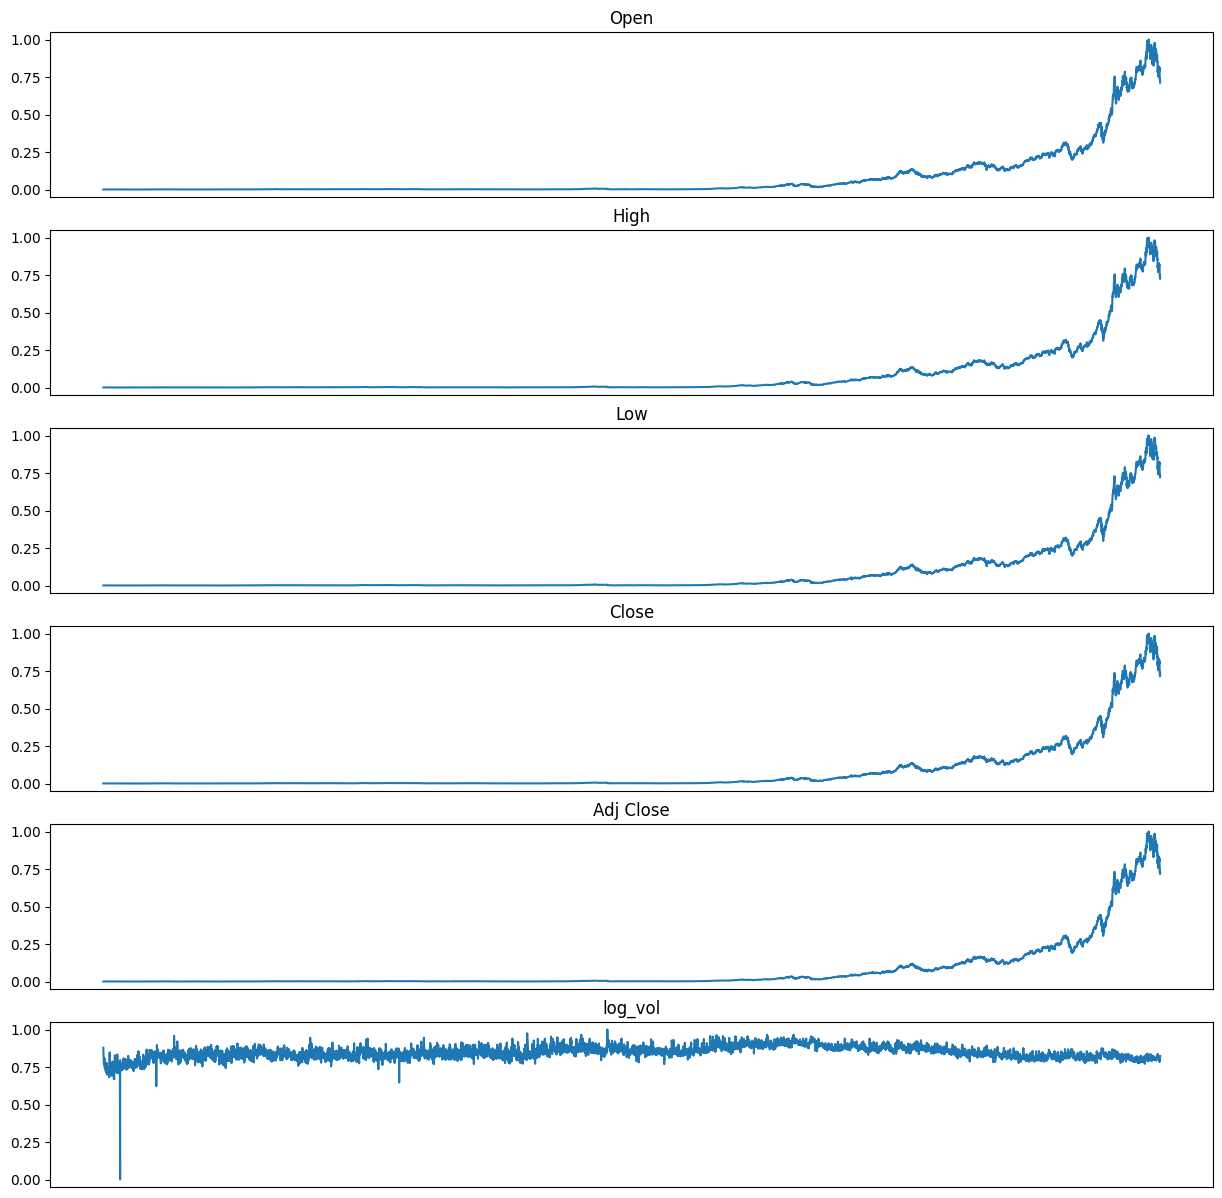

In [19]:
plt.rcParams['figure.figsize'] = (15,15)
figure, axes = plt.subplots(6)

for ax, col in zip(axes, scaled_df.columns):
    ax.plot(scaled_df[col])
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)

# CREATING THE SLIDING WINDOW SEQUENCE

In [20]:
window_size = 60

def create_sequence(data, window_size):
    x = []
    y = []
    for i in range(window_size, len(data)):
        x.append(data.iloc[i-window_size:i].values)
        y.append(data.iloc[i].values)
    return np.array(x), np.array(y)

x,y = create_sequence(scaled_df, window_size)

In [21]:
x.shape, y.shape

((10408, 60, 6), (10408, 6))

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8326, 60, 6), (2082, 60, 6), (8326, 6), (2082, 6))

# BUILDING LSTM MODEL

In [23]:
model = keras.Sequential([
    #ADDING THE FIRST LSTM LAYER WITH DROPOUT
    keras.layers.LSTM(units = 50, return_sequences=True, input_shape = (x_train.shape[1],x_train.shape[2])),
    keras.layers.Dropout(0.3),
                      
    #ADDING THE FIRST LSTM LAYER WITH DROPOUT
    keras.layers.LSTM(units = 50, return_sequences=True),
    keras.layers.Dropout(0.3),
                      
    #ADDING THE FIRST LSTM LAYER WITH DROPOUT
    keras.layers.LSTM(units = 50, return_sequences=False),
    keras.layers.Dropout(0.3),
    #ADDING A DENSE OUTPUT LAYER
    keras.layers.Dense(y_train.shape[1])
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.compile(optimizer = 'adam',
             loss = 'mean_squared_error',
             metrics = ['RootMeanSquaredError'])

In [25]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                              patience = 5, #WILL CHECK FOR HOW MANY EPOCHS LOSS IS NOT CHANGING MUCH
                              restore_best_weights = True)

In [26]:
history = model.fit(x_train, y_train,
                   validation_split = 0.2,
                   epochs = 100,
                   batch_size = 3,
                   callbacks = [early_stopping])

Epoch 1/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - RootMeanSquaredError: 0.0910 - loss: 0.0089 - val_RootMeanSquaredError: 0.0193 - val_loss: 3.7384e-04
Epoch 2/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - RootMeanSquaredError: 0.0444 - loss: 0.0020 - val_RootMeanSquaredError: 0.0215 - val_loss: 4.6387e-04
Epoch 3/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - RootMeanSquaredError: 0.0343 - loss: 0.0012 - val_RootMeanSquaredError: 0.0271 - val_loss: 7.3400e-04
Epoch 4/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - RootMeanSquaredError: 0.0315 - loss: 9.9759e-04 - val_RootMeanSquaredError: 0.0163 - val_loss: 2.6664e-04
Epoch 5/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - RootMeanSquaredError: 0.0297 - loss: 8.8401e-04 - val_RootMeanSquaredError: 0.0190 - val_loss: 3.6133e-04
Epoch 6/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - RootMeanSquaredError: 0.0277 - loss: 7.6910e-04 - val_RootMeanSquaredError: 0.0155 - val_loss: 2.3983e-04
Epoch 7/100
2220/2220 

**GETS STOPPED ONLY AFTER 11 EPOCHS BEACUSE OF EARLY STOPPING**

In [27]:
pred = model.predict(x_test)

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [28]:
#INVERSE SCALING TO GET THE ACTUAL VALUES
pred = scaler.inverse_transform(pred)
y_test_rescaled = scaler.inverse_transform(y_test)

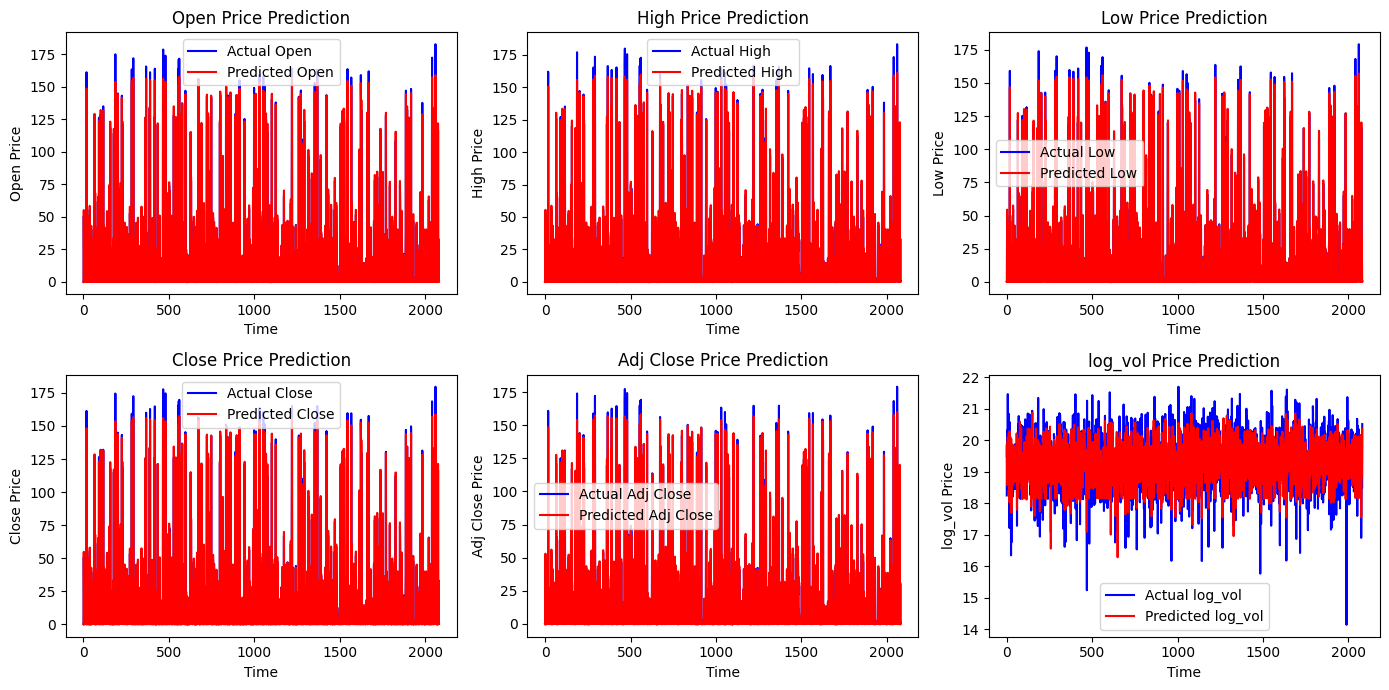

In [29]:
plt.figure(figsize=(14,7))

for i, col in enumerate(scaled_df.columns):
    plt.subplot(2,3,i+1)
    plt.plot(y_test_rescaled[:,i], color = 'blue', label = f'Actual {col}')
    plt.plot(pred[:,i], color = 'red', label = f'Predicted {col}')
    plt.title(f'{col} Price Prediction')
    plt.xlabel('Time')
    plt.ylabel(f'{col} Price')
    plt.legend()

plt.tight_layout()